In [25]:
# loads the necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler  
from sklearn.tree import DecisionTreeClassifier
from sklearn import datasets
from sklearn import metrics
import seaborn as sns
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
from sklearn import tree

In [26]:
# load the iris dataset
iris = pd.read_csv("./datasets/iris.csv")
iris.head()

,id,sepal_length,sepal_width,petal_length,petal_width,species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [27]:
X = iris[["petal_length", "sepal_length"]]

In [28]:
X.head()

,petal_length,sepal_length
0,1.4,5.1
1,1.4,4.9
2,1.3,4.7
3,1.5,4.6
4,1.4,5.0


In [29]:
y = iris[['species']]
y.head()

,species
0,Iris-setosa
1,Iris-setosa
2,Iris-setosa
3,Iris-setosa
4,Iris-setosa


In [30]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state = 0)

In [31]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [38]:
cart = DecisionTreeClassifier(criterion='gini', random_state=100, max_depth=4, min_samples_leaf=6)

In [39]:
model = cart.fit(x_train, y_train)

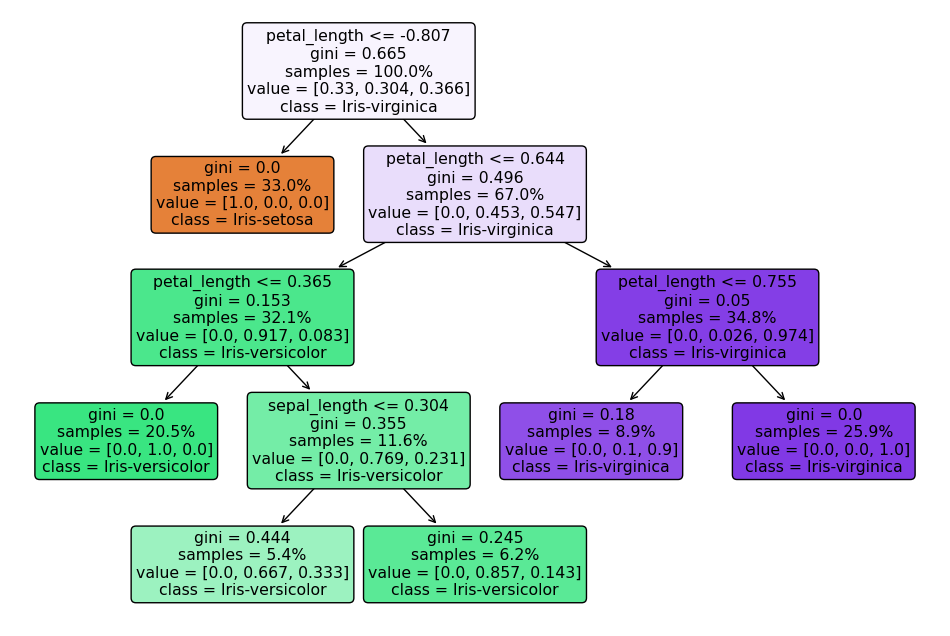

In [40]:
plt.figure(figsize=(12, 8))
tree.plot_tree(cart, feature_names = X.columns.tolist(), label = "all", impurity = True,  class_names= y["species"].unique().tolist(), rounded = True,filled = True, proportion = True)
plt.show()

In [41]:
y_pred = cart.predict(x_test)

In [42]:
conf = metrics.confusion_matrix(y_test, y_pred)
conf

array([[13,  0,  0],
       [ 0, 15,  1],
       [ 0,  3,  6]], dtype=int64)

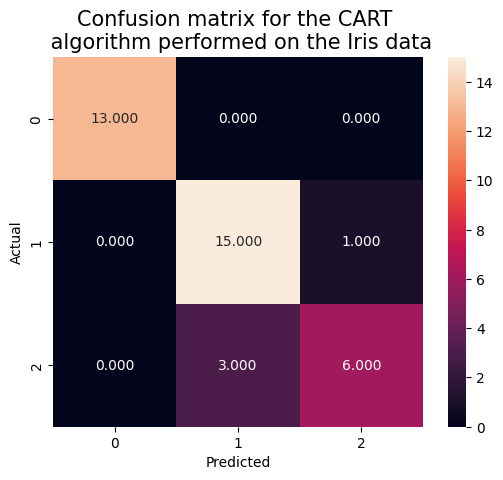

In [43]:
sns.heatmap(conf, annot=True, fmt=".3f", square = True);
plt.ylabel('Actual');
plt.xlabel('Predicted');
plt.title('Confusion matrix for the CART \n algorithm performed on the Iris data', fontsize = 15);